<a href="https://colab.research.google.com/github/maishamostafa/Capstone_ST1/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!ls

car_price_prediction.csv  CarPricePrediction.ipynb


### This Project is based on the famous Car price prediction data available from Kaggle repository (https://www.kaggle.com/datasets/vikrishnan/boston-house-prices ).


*   It contains the details of 19238 cars.
*   My project task is to create a machine learning model which can predict the average price of cars based on its characteristics.
* For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on (machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes.



In [ ]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

Shape before deleting duplicate values: (19237, 18)
Shape After deleting duplicate values: (18924, 18)
         ID  Price  Levy Manufacturer     Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS    RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET   Equinox        2011       Jeep   
2  45774419   8467     -        HONDA       FIT        2006  Hatchback   
3  45769185   3607   862         FORD    Escape        2011       Jeep   
4  45809263  11726   446        HONDA       FIT        2014  Hatchback   
5  45802912  39493   891      HYUNDAI  Santa FE        2016       Jeep   
6  45656768   1803   761       TOYOTA     Prius        2010  Hatchback   
7  45816158    549   751      HYUNDAI    Sonata        2013      Sedan   
8  45641395   1098   394       TOYOTA     Camry        2014      Sedan   
9  45756839  26657     -        LEXUS    RX 350        2007       Jeep   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0             

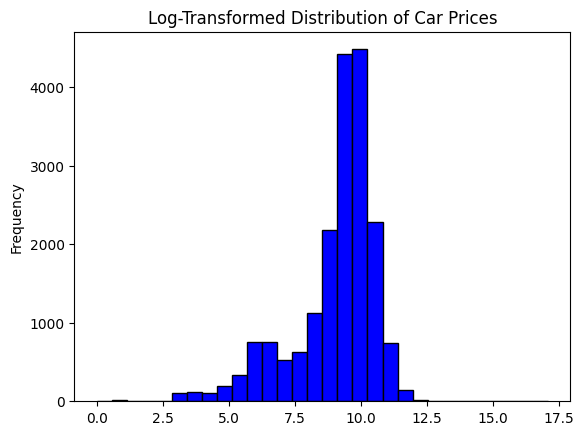

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Add this line to import the plotting library

car_price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_price_prediction.csv', encoding='latin')
print('Shape before deleting duplicate values:', car_price.shape)

# Removing duplicate rows if any
car_price = car_price.drop_duplicates()
print('Shape After deleting duplicate values:', car_price.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
print(car_price.head(10))

%matplotlib inline

# Replace zero prices with NaN and then drop rows with NaN prices
car_price['Price'] = car_price['Price'].replace(0, np.nan)
car_price.dropna(subset=['Price'], inplace=True)  # This now correctly modifies the DataFrame in-place

# Calculate the log of prices now that there are no zero values
car_price['Log_Price'] = np.log(car_price['Price'])

# Plotting the transformed prices
plt.hist(car_price['Log_Price'], bins=30, color='blue', edgecolor='black')
plt.title('Log-Transformed Distribution of Car Prices')
plt.ylabel('Frequency')
plt.show()


**Step 2: Problem Statement Definition**

* Creating a prediction model to predict the price (Price) of a car.
* Target Variable: Price
Predictors/Features:
Levy
Manufacturer
Model
Prod. year
Category
Leather interior
Fuel type
Engine volume
Mileage
Cylinders
Gear box type
Drive wheels
Doors
Wheel
Color
Airbags


**Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.**
Based on the problem statement we need to create a supervised ML Regression model, as the target variable is continuous.

In [ ]:
# Importing necessary libraries
import pandas as pd

# Reading the dataset
df = pd.read_csv("car_price_prediction.csv")

# Displaying the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Displaying information about the dataset including data types
print("\nDataset information:")
print(df.info())

# Identifying the continuous target variable
print("\nContinuous target variable:")
for column in df.columns:
    if df[column].dtype in ['int64', 'float64'] and column != 'ID':
        print("- Target variable:", column)
        break


First 5 rows of the dataset:
         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left 

**Step 4: Looking at the Class Distribution (Target Variable distribution to check if the data is balanced or skewed)**.

* If target variable's distribution is too skewed then the predictive modeling will lead to poor results.
* Ideally Bell curve is desirable but slightly positive skew or negative skew is also fine.
* When performing Regression algorithm modelling and analysis, we need to make sure the histogram looks like a bell curve or slight skewed version of it.
* Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios from the data.

<Axes: >

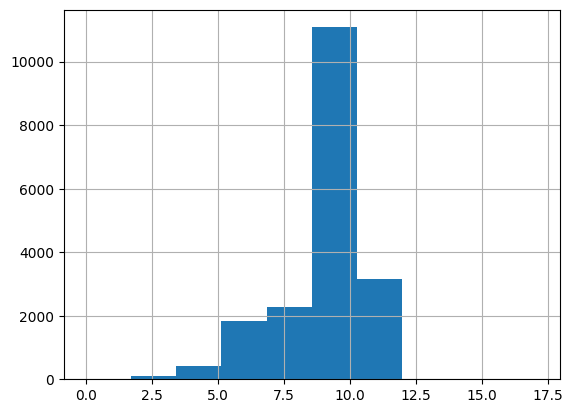

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the price
car_price['Log_Price'].hist()

## Observations from Step 4
* The data distribution of the target variable is satisfactory to proceed further.
* There are sufficient number of rows for each type of values to learn from.

## Step 5: Basic Exploratory Data Analysis
* This step is performed to guage the overall data.
* The volume of data, the types of columns present in the data.
* Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

* This step helps to start the column/data rejection process.
* You must look at each column carefully and ask, does this column affect the values of the Target variable/Class?
* For example in this dataset, you will ask, does this column affect the price of the house?
* If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

* There are four commands which are used for Basic data exploratory Analysis in Python

* head() : This helps to see a few sample rows of the data
* info() : This provides the summarized information of the data
* describe() : This provides the descriptive statistical details of the data
* nunique(): This helps us to identify if a column is categorical or continuous


In [ ]:
# Looking at sample rows in the data
car_price.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Log_Price
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,9.497622
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,9.718422
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,9.043932
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,8.190632
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,9.369564


In [ ]:
# Looking at sample rows in the data
car_price.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Log_Price
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,9.043932
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,9.660205
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,10.169997
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,8.581294
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12,6.152733


In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
car_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [ ]:
# Looking at the descriptive statistics of the data
car_price.describe(include='all')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Log_Price
count,1.892400e+04,1.892400e+04,18924,18924,18924,18924.000000,18924,18924,18924,18924,18924,18924.000000,18924,18924,18924,18924,18924,18924.000000,18924.000000
unique,NaN,NaN,559,65,1590,NaN,11,2,7,107,7687,NaN,4,3,3,2,16,NaN,NaN
top,NaN,NaN,-,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,04-May,Left wheel,Black,NaN,NaN
freq,NaN,NaN,5709,3729,1069,NaN,8600,13731,9944,3856,714,NaN,13282,12695,18032,17471,4944,NaN,NaN
mean,4.557538e+07,1.858744e+04,NaN,NaN,NaN,2010.914236,NaN,NaN,NaN,NaN,NaN,4.580216,NaN,NaN,NaN,NaN,NaN,6.568379,9.027795
std,9.375468e+05,1.921356e+05,NaN,NaN,NaN,5.665749,NaN,NaN,NaN,NaN,NaN,1.200223,NaN,NaN,NaN,NaN,NaN,4.322323,1.588994
min,2.074688e+07,1.000000e+00,NaN,NaN,NaN,1939.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,4.569501e+07,5.331000e+03,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000,8.581294
50%,4.577191e+07,1.317200e+04,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,6.000000,9.485849
75%,4.580174e+07,2.206300e+04,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,12.000000,10.001657


In [ ]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
car_price.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
Log_Price            2315
dtype: int64

## Observations from Step 5 - Basic Exploratory Data Analysis
* Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column.
* Hence, creating a initial roadmap for further analysis.

* The selected columns in this step are not final, further study will be done and then a final list will be created

* ID                     Continuous. Selected.
* Price                  Continuous. Selected.
* Levy                   Continuous. Selected.
* Manufacturer           Continuous. Selected.
* Model                  Continuous. Selected.
* Prod. year             Continuous. Selected.
* Category               Categorical. Selected.
* Leather interior       Categorical. Selected.
* Fuel type              Categorical. Selected.
* Engine volume          Continuous. Selected.
* Mileage                Continuous. Selected.
* Cylinders              Categorical. Selected.
* Gear box type          Categorical. Selected.
* Drive wheels           Categorical. Selected.
* Doors                  Categorical. Selected.
* Wheel                  Categorical. Selected.
* Color                  Categorical. Selected.
* Airbags                Categorical. Selected.

**Step 6: Removing Unwanted columns**
* The ID column in the data is qualitative.
* Hence we need to remove the column ID.

**Step 7: Visual Exploratory Data Analysis**
* Visualize distribution of all the Categorical Predictor variables in the data using bar plots
* We can spot a categorical variable in the data by looking at the unique values in them.
* Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.
* Based on the Basic Exploration Data Analysis in the previous step, we could spotted ten categorical predictors in the data
* Categorical Predictors:
* 'Category',
* ‘Leather interior’,
* 'Fuel Type',
* 'Cylinders',
* 'Gear Box Types',
* 'Drive Wheels',
* 'Doors',
* 'Wheel',
* 'Color',
* 'Airbags'

* We will use bar charts to see how the data is distributed for these categorical columns.

In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(35,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

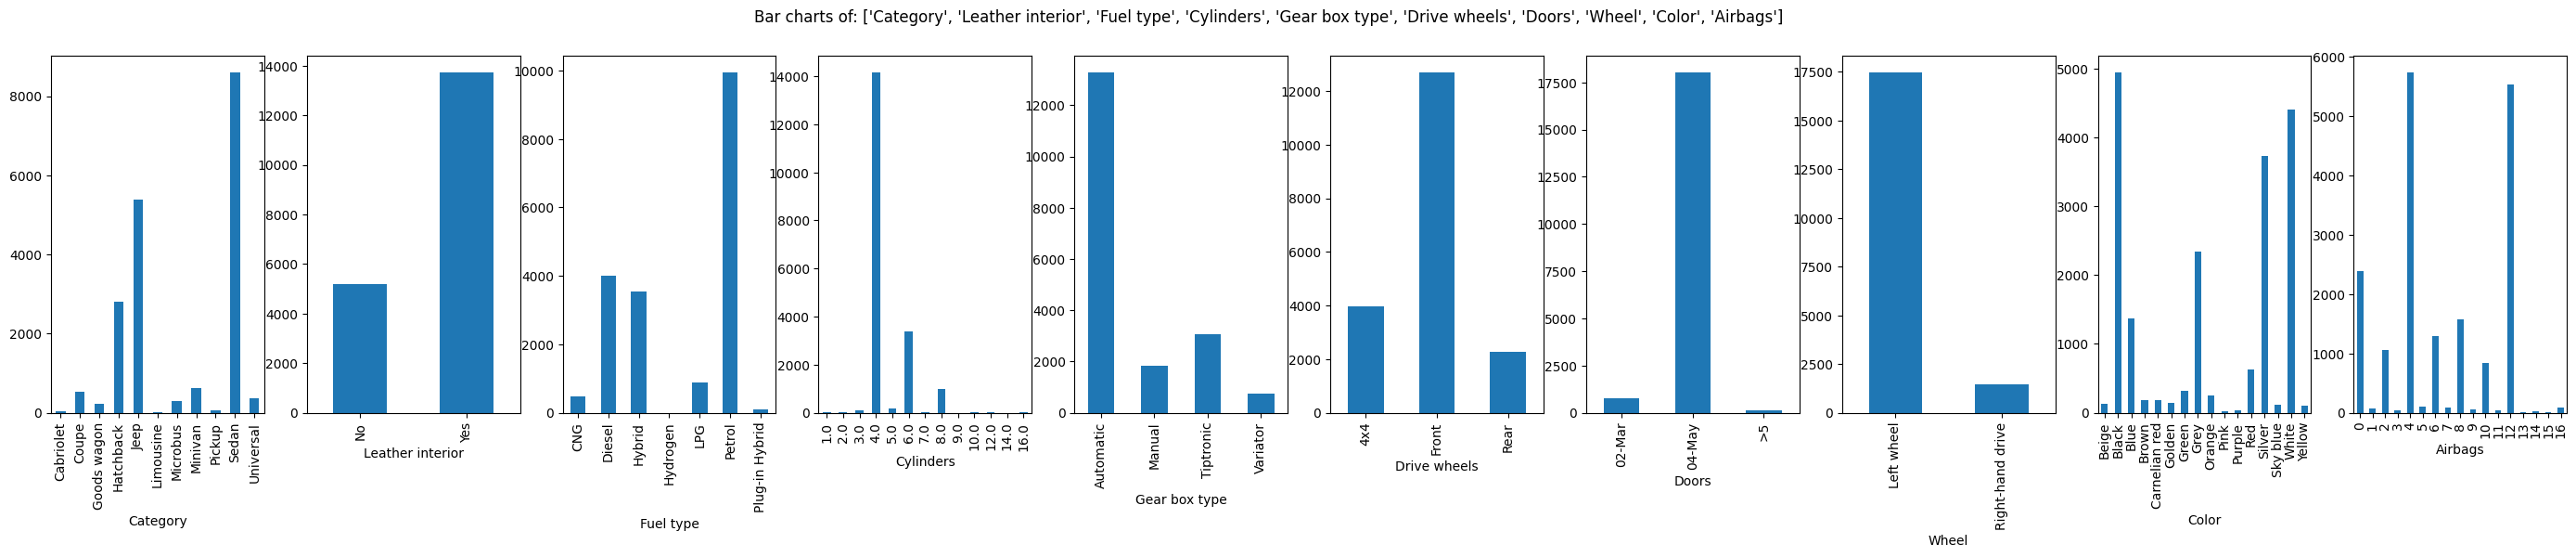

In [ ]:
#####################################################################
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=car_price, colsToPlot=['Category','Leather interior',
                                             'Fuel type','Cylinders',
                                             'Gear box type','Drive wheels',
                                             'Doors','Wheel','Color','Airbags'])

**Step 8: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms**
* Based on the Basic Exploratory Data Analysis, there are eight continuous predictor variables 'ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. Year', 'Engine Volume', 'Mileage'.

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Log_Price'}>,
        <Axes: title={'center': 'Levy'}>],
       [<Axes: title={'center': 'Manufacturer'}>,
        <Axes: title={'center': 'Model'}>,
        <Axes: title={'center': 'Prod. year'}>],
       [<Axes: title={'center': 'Engine volume'}>,
        <Axes: title={'center': 'Mileage'}>, <Axes: >]], dtype=object)

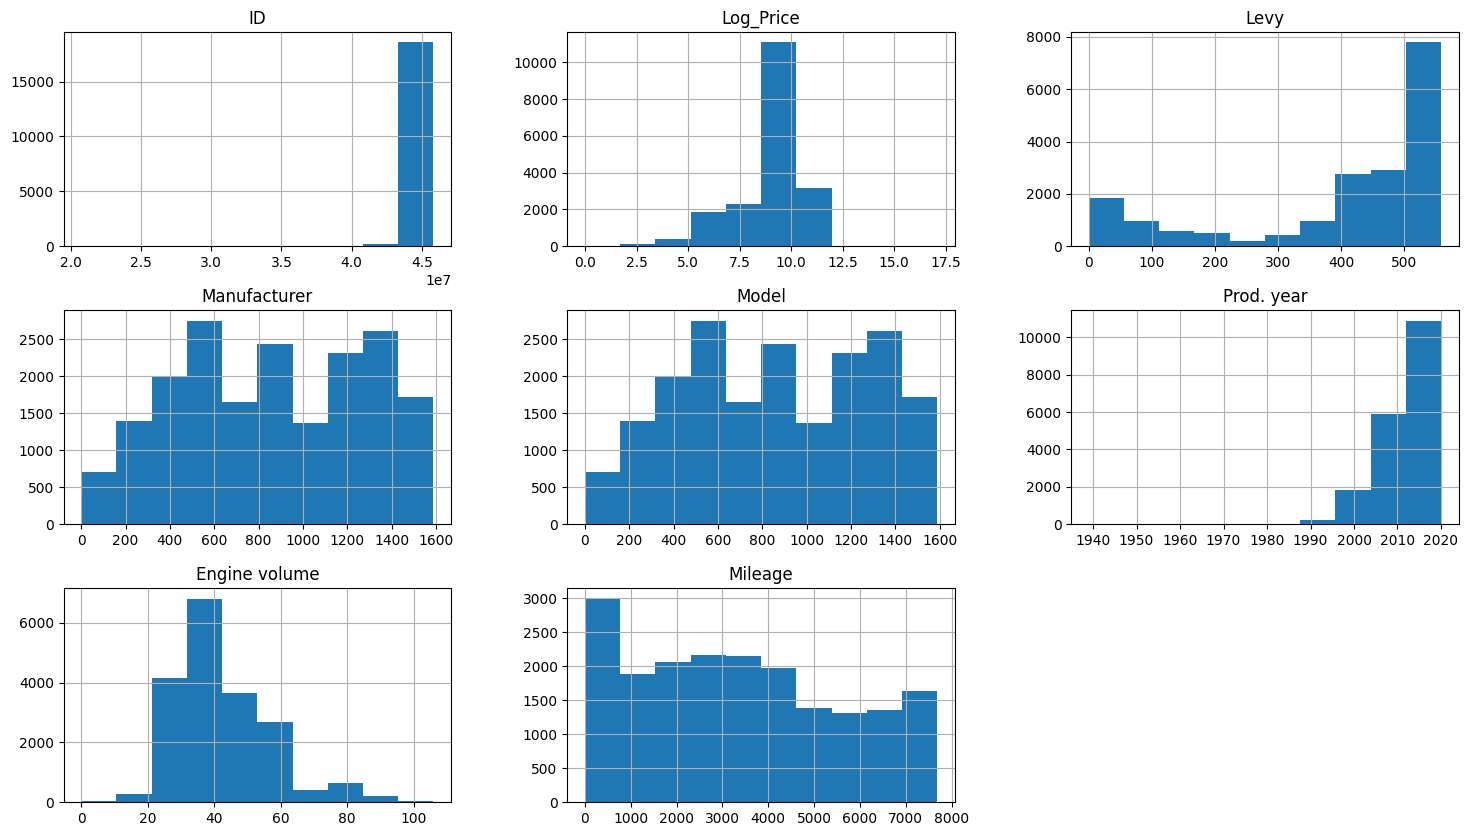

In [ ]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

car_price['Model'] = labelEncoder.fit_transform(car_price['Model'])
car_price['Levy'] = car_price['Levy'].replace('-', np.nan)
car_price['Manufacturer'] = labelEncoder.fit_transform(car_price['Model'])
car_price['Levy'] = labelEncoder.fit_transform(car_price['Levy'])
car_price['Mileage'] = labelEncoder.fit_transform(car_price['Mileage'])
car_price['Engine volume'] = labelEncoder.fit_transform(car_price['Engine volume'])

# Plotting histograms of multiple columns together
car_price.hist(['ID', 'Log_Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
                 'Engine volume', 'Mileage'], figsize=(18,10))

**Step 9: Outlier Analysis**
* Outliers are extreme values in the data which are far away from most of the values.
* You can see them as the tails in the histogram.

* Outlier must be treated one column/data attribute at a time.
* As the treatment will be slightly different for each column
* Why I should analyse the outliers?
* Outliers bias the building of machine learning models.
* As the algorithm tries to fit the extreme value, it goes away from majority of the data.
* Outlined below are two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value
* Let us find out out the most logical value to be replaced in place of outliers by looking at the histogram.



In [ ]:
#Replacing outliers for 'Price'
# Finding nearest values to 7000
car_price['Log_Price'][car_price['Log_Price']<7000].sort_values(ascending=False)

16983    17.085365
8541     13.679629
1225     13.349053
5008     12.640792
9367     12.604614
           ...    
221       1.098612
5890      1.098612
11636     1.098612
16992     0.000000
7815      0.000000
Name: Log_Price, Length: 18924, dtype: float64

Observation: Above result shows the nearest logical value is 6981, hence, replacing any value above 7000 with it.

In [ ]:
# Replacing outliers with nearest possibe value
car_price['Log_Price'][car_price['Log_Price']>7000] = 6981

**Step 10:Visualising Data Distribution after outlier removal**

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

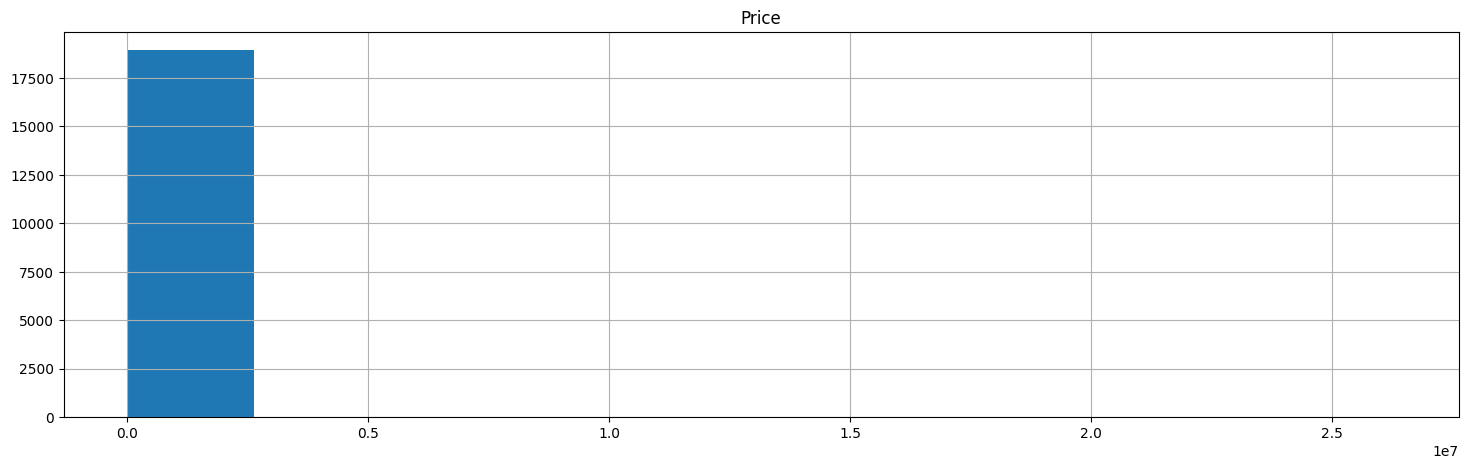

In [ ]:
car_price.hist(['Price'], figsize=(18,5))

##Observation from Step 10
* The distribution has improved after the outlier treatment.
* There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

**Step 11: Missing Values Analysis**

* Missing values are treated for each column separately.
* If a column has more than 30% data missing, then missing value treatment cannot be done.
* That column must be rejected because too much information is missing.
* Outlined below are some options for treating missing values in data.
* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [ ]:
# Finding how many missing values are there for each column
car_price.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Log_Price           0
dtype: int64

##Observations from Step 11: Missing Value Analysis
* No missing values in this data!
* So no removal of any data samples(rows) is needed.

**Step 12: Feature Selection (Attribute Selection)**

* Now its time to finally choose the best columns(Features) which are correlated
to the Target variable.
* This can be done directly by measuring the correlation values or ANOVA
analysis or Chi-Square tests.
* However, it is always helpful to visualize the relation between the Target
variable/class variable and each of the predictors(features) to get a better
sense of data.

* Listed below are some of the techniques used for visualizing relationship
between two variables as well as measuring the strength statistically.

* **Visual exploration of relationship between variables**
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots
* Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

* **For this dataset, the Target variable is Continuous, hence following two
scenarios will need attention**

* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

## Relationship exploration: Continuous Vs Continuous -- Scatter Charts
* When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using a metric called pearson's correlation value.

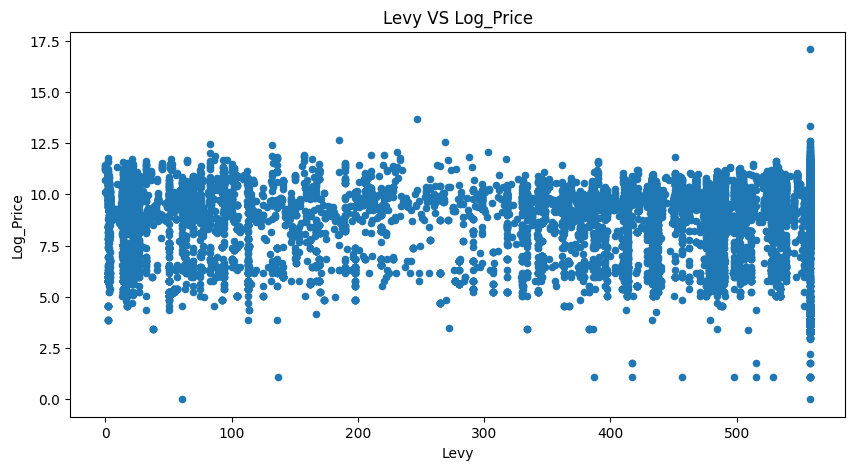

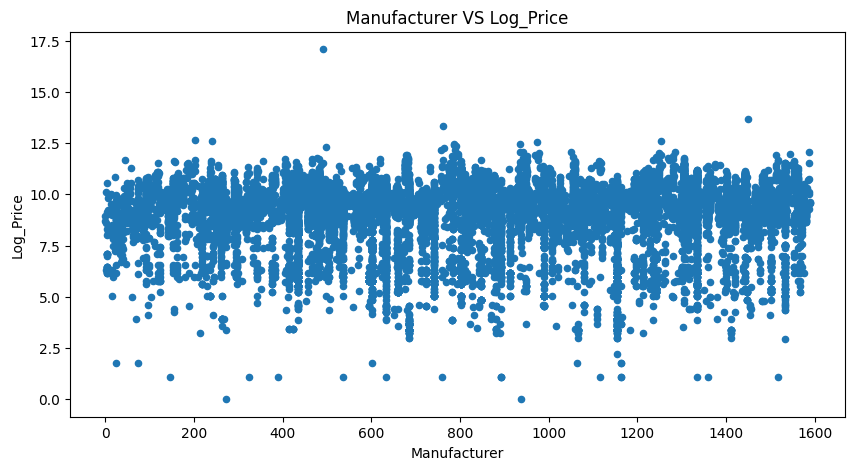

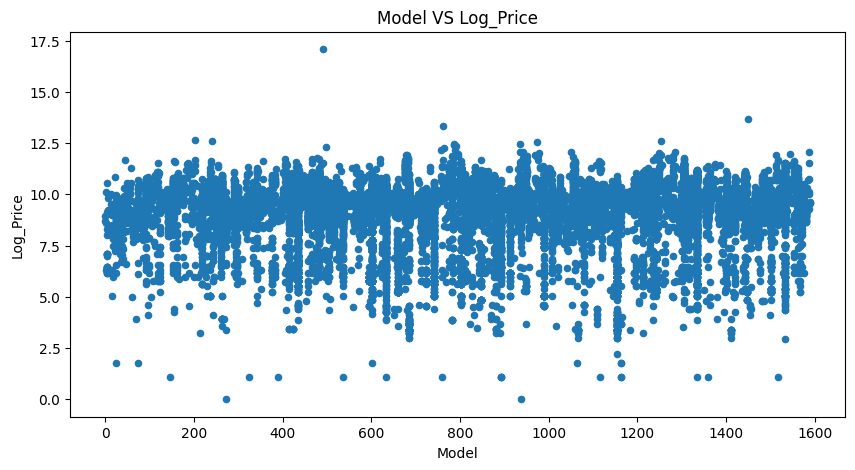

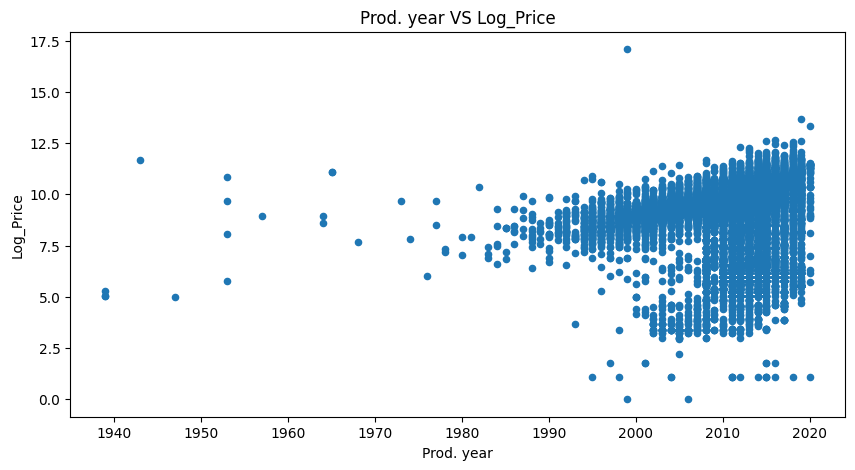

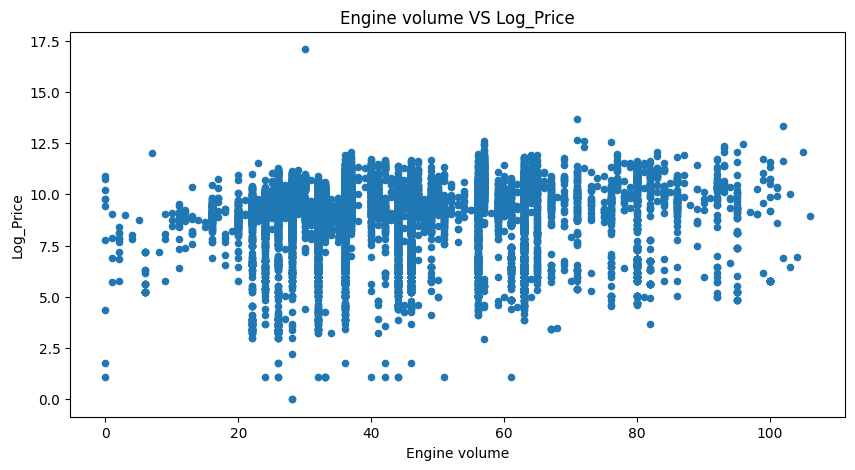

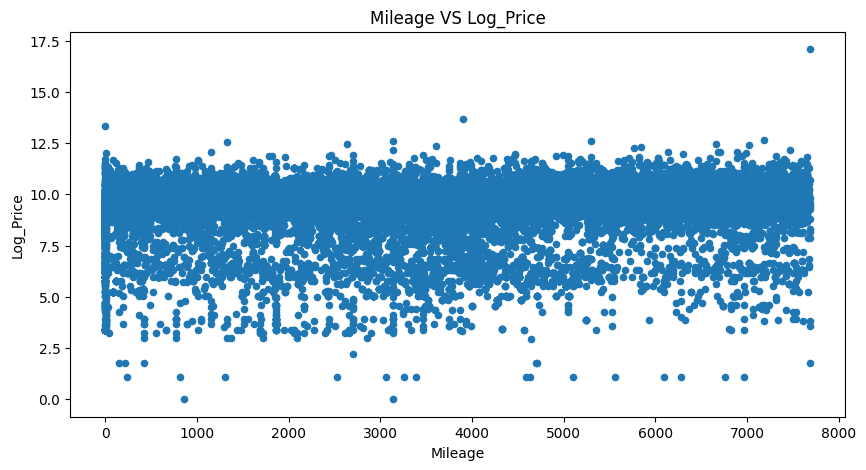

In [ ]:
ContinuousCols=['Levy', 'Manufacturer', 'Model', 'Prod. year',
                 'Engine volume', 'Mileage']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    car_price.plot.scatter(x=predictor, y='Log_Price', figsize=(10,5),
    title=predictor+" VS "+ 'Log_Price')

## Scatter charts interpretation
* What should you look for in these scatter charts?

* **Trend.** You should try to see if there is a visible trend or not. There could be three scenarios

* **Increasing Trend**: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML model building!

* **Decreasing Trend:** This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML model building!

* **No Trend**: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence that predictor/feature may not be the best one for ML model building.

* Based on this chart we can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value in the next step.

## Step 13: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

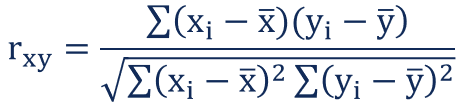


* Pearson's correlation coefficient is a powerful metric for doing this.
* It can simply be calculated as the covariance between two features  x and  y
* This value can be calculated only between two numeric columns
Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question.

In [ ]:
# Calculating correlation matrix
ContinuousCols=['Log_Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Engine volume', 'Mileage']

# Creating the correlation matrix this also need alll numerical value.
CorrelationData=car_price[ContinuousCols].corr()
CorrelationData



,Log_Price,Levy,Manufacturer,Model,Prod. year,Engine volume,Mileage
Log_Price,1.000000,0.097373,0.054759,0.054759,0.139161,-0.016806,0.103790
Levy,0.097373,1.000000,0.033966,0.033966,-0.323120,-0.297072,-0.066447
Manufacturer,0.054759,0.033966,1.000000,1.000000,0.064736,0.025503,0.010489
Model,0.054759,0.033966,1.000000,1.000000,0.064736,0.025503,0.010489
Prod. year,0.139161,-0.323120,0.064736,0.064736,1.000000,-0.034546,0.190099
Engine volume,-0.016806,-0.297072,0.025503,0.025503,-0.034546,1.000000,-0.025135
Mileage,0.103790,-0.066447,0.010489,0.010489,0.190099,-0.025135,1.000000


In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Log_Price'][abs(CorrelationData['Log_Price']) > 0.5]

Log_Price    1.0
Name: Log_Price, dtype: float64

**# Step 15:  Relationship exploration: Categorical Vs Continuous -- Box Plots
* When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots,  and
* Measure the strength of relation using Anova test.


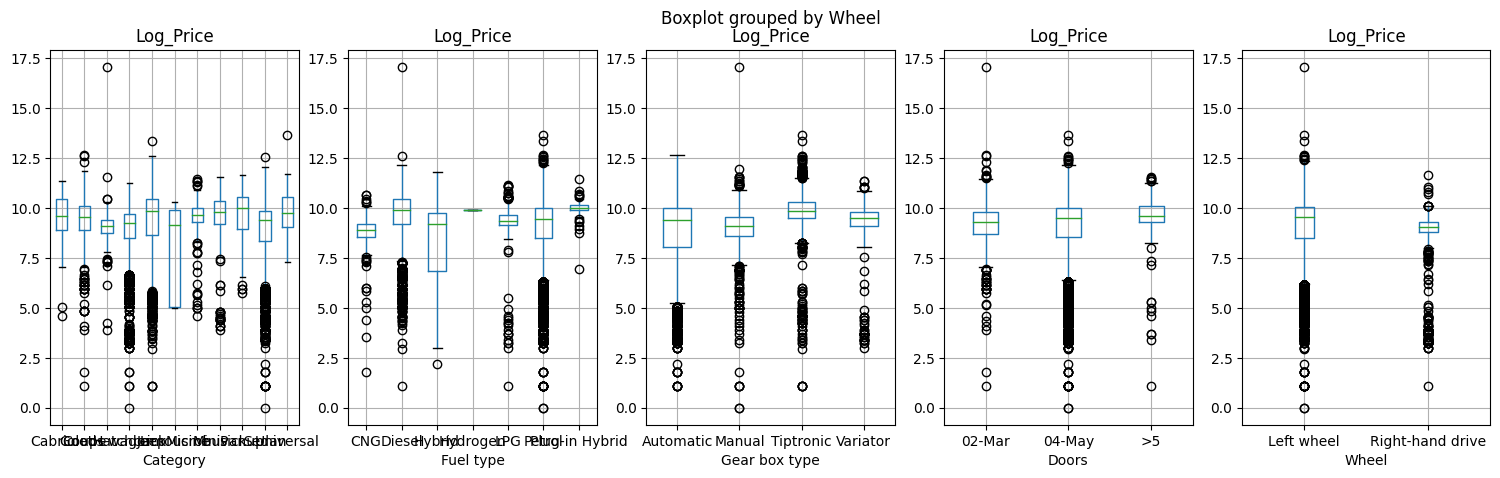

In [ ]:
# Box plots for continuous Target Variable "Log_Price" and Categorical predictors
CategoricalColsList=['Category', 'Fuel type', 'Gear box type', 'Doors', 'Wheel']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    car_price.boxplot(column='Log_Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

##Observations from Step 15: Box-Plots interpretation

* What should you look for in these box plots?

* These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

* If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

* On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Log_Price.

* For this datadata, both the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below


**Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test**

* Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0) Null Hypothesis: There is NO relation between the given variables (i.e.
* The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 (Null Hypothesis being true

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Category', 'Leather interior', 'Fuel type',
                          'Cylinders', 'Gear box type', 'Doors', 'Wheel',
                          'Color', 'Airbags']
FunctionAnova(inpData=car_price,
              TargetVariable='Price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Category is correlated with Price | P-Value: 1.0977382738805408e-13
Leather interior is NOT correlated with Price | P-Value: 0.9395896416698089
Fuel type is correlated with Price | P-Value: 0.0005003195223169007
Cylinders is NOT correlated with Price | P-Value: 0.9896527007288068
Gear box type is correlated with Price | P-Value: 0.016235737783921872
Doors is correlated with Price | P-Value: 1.2517564884244667e-05
Wheel is correlated with Price | P-Value: 0.04521115121963431
Color is NOT correlated with Price | P-Value: 0.6886746310455041
Airbags is NOT correlated with Price | P-Value: 0.783495962854769


['Category', 'Fuel type', 'Gear box type', 'Doors', 'Wheel']

##Observations from Step 16
* The results of ANOVA confirm our visual analysis using box plots above.

* All categorical variables are correlated with the Target variable.
* This is something you can guess by looking at the box plots!

* Final selected Categorical columns:

**'Category', 'Fuel type', 'Gear box type', 'Doors', 'Wheel'**

# Step 17:  Relationship exploration: Categorical Vs Continuous -- Box Plots
* When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots,  and
* Measure the strength of relation using Anova test.

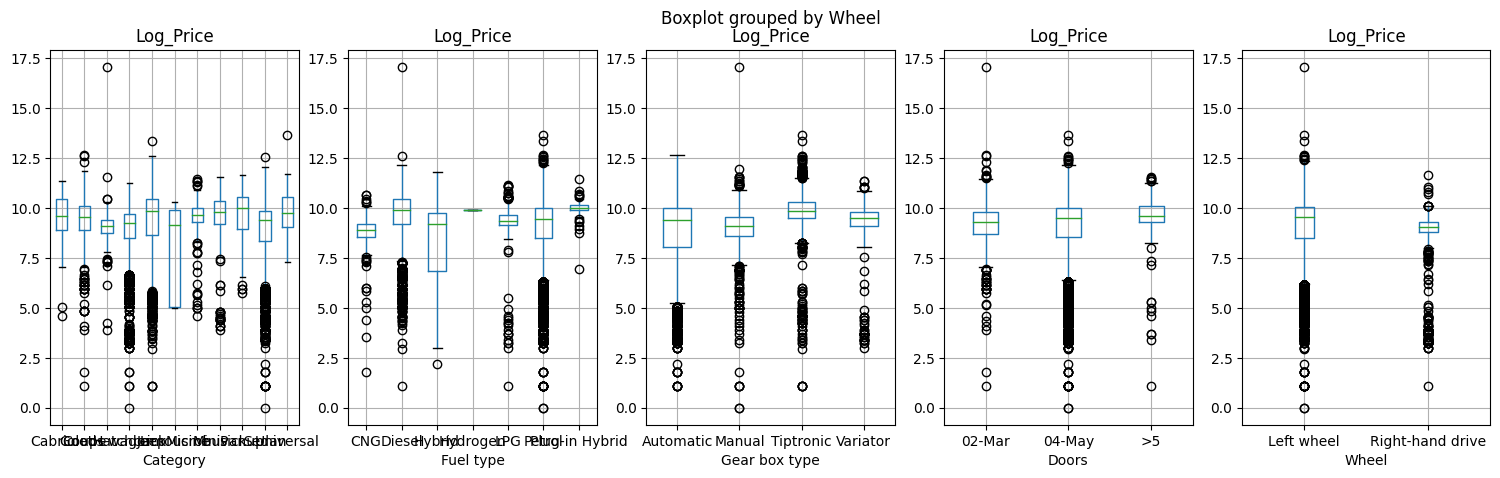

In [ ]:
# Box plots for continuous Target Variable "Log_Price" and Categorical predictors
CategoricalColsList=['Category', 'Fuel type', 'Gear box type', 'Doors', 'Wheel']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    car_price.boxplot(column='Log_Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

##Observations from Step 17: Box-Plots interpretation


* These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

* If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

* On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with MEDV.

* For this datadata, both the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

## **Step 18: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test**

* Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0) Null Hypothesis: There is NO relation between the given variables (i.e.
* The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 (Null Hypothesis being true

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Category', 'Fuel type', 'Gear box type', 'Doors', 'Wheel']
FunctionAnova(inpData=car_price,
              TargetVariable='Log_Price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Category is correlated with Log_Price | P-Value: 2.0340998516352776e-111
Fuel type is correlated with Log_Price | P-Value: 6.514134278477985e-258
Gear box type is correlated with Log_Price | P-Value: 3.0712816086049926e-210
Doors is correlated with Log_Price | P-Value: 0.001272969419145822
Wheel is correlated with Log_Price | P-Value: 2.975157110189798e-31


['Category', 'Fuel type', 'Gear box type', 'Doors', 'Wheel']

##Observations from Step 18
* The results of ANOVA confirm our visual analysis using box plots above.

* All categorical variables are correlated with the Target variable.
* This is something we can guess by looking at the box plots!

* Final selected Categorical columns:

 **'Category', 'Fuel type', 'Gear box type', 'Doors', 'Wheel'**

## Selecting final Predictors/Features for building Machine Learning/AI model.
* Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning model building as:
* **'Category', 'Fuel type', 'Gear box type', 'Doors', 'Wheel'**


In [ ]:
SelectedColumns=['Category', 'Fuel type', 'Gear box type', 'Doors', 'Wheel']

# Selecting final columns
DataForML=car_price[SelectedColumns]
DataForML.head()

,Category,Fuel type,Gear box type,Doors,Wheel
0,Jeep,Hybrid,Automatic,04-May,Left wheel
1,Jeep,Petrol,Tiptronic,04-May,Left wheel
2,Hatchback,Petrol,Variator,04-May,Right-hand drive
3,Jeep,Hybrid,Automatic,04-May,Left wheel
4,Hatchback,Petrol,Automatic,04-May,Left wheel


In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## **Step 19: Data Pre-processing for Machine Learning Model Building or Model Development**
* List of steps that needs to be performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks
* Converting the ordinal variable to numeric - In this data there is no Ordinal categorical variable.
* Converting the binary nominal variable to numeric using 1/0 mapping: There is no binary nominal variable in string format in this data


## Converting the nominal variable to numeric using get_dummies()

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['log_Price']=car_price['Log_Price']

# Printing sample rows
DataForML_Numeric.head()

,Category_Cabriolet,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,...,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Doors_02-Mar,Doors_04-May,Doors_>5,Wheel_Left wheel,Wheel_Right-hand drive,log_Price
0,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,9.497622
1,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,9.718422
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,9.043932
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,8.190632
4,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,9.369564


## **Step 20: Machine Learning Model Development:**
* Splitting the data into Training and Testing sample
* We dont use the full data for creating the model (training data).
* Some data is randomly selected and kept aside for checking how good the model is.
* This is known as Testing Data and the remaining data is called Training data on which the model is built.
* Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Category_Cabriolet', 'Category_Coupe', 'Category_Goods wagon',
       'Category_Hatchback', 'Category_Jeep', 'Category_Limousine',
       'Category_Microbus', 'Category_Minivan', 'Category_Pickup',
       'Category_Sedan', 'Category_Universal', 'Fuel type_CNG',
       'Fuel type_Diesel', 'Fuel type_Hybrid', 'Fuel type_Hydrogen',
       'Fuel type_LPG', 'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid',
       'Gear box type_Automatic', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator', 'Doors_02-Mar',
       'Doors_04-May', 'Doors_>5', 'Wheel_Left wheel',
       'Wheel_Right-hand drive', 'log_Price'],
      dtype='object')

In [ ]:
# Define the target and predictor variables
TargetVariable = 'log_Price'
Predictors = ['Category_Sedan', 'Fuel type_Petrol', 'Gear box type_Automatic', 'Wheel_Left wheel']

# Ensure the predictor names match those in your DataFrame
X = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)


## **Step 21: Standardization/Normalization of data**
* we can choose not to run this step if we want to compare the resultant accuracy of this transformation with the accuracy of raw data (Optional Step)

* However, if we are using KNN or Neural Networks, then this step becomes necessary.

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13246, 4)
(13246,)
(5678, 4)
(5678,)


## **Step 22: Multiple Linear Regression Algorithm For ML/AI model building**


In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults[TargetVariable]-TestingDataResults[TargetVariable]))/TestingDataResults[TargetVariable])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.05026144334755922

##### Model Validation and Accuracy Calculations ##########
   Category_Sedan  Fuel type_Petrol  Gear box type_Automatic  \
0             1.0               1.0                      1.0   
1             1.0               1.0                      1.0   
2             1.0               1.0                      1.0   
3             0.0               1.0                      1.0   
4             0.0               0.0                      0.0   

   Wheel_Left wheel  log_Price  Predictedlog_Price  
0               1.0   9.359105                 9.0  
1               1.0   6.152733                 9.0  
2               1.0   9.911555                 9.0  
3               0.0   8.926252                 8.0  
4               1.0   9.842516                10.0  
Mean Accuracy on test data: 100.0
Median Accuracy on test data: 100.0

Accuracy values for 10-fold Cross Validation:
 [83.14971484 84.46833739 83.74994027 83.10932322        -inf 84.14220

# **Decision Regressor Tree**

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults[TargetVariable]-TestingDataResults[TargetVariable]))/TestingDataResults[TargetVariable])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting/Visualising the Decision Tree

In [ ]:

# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1600,height=1000)
# Double click on the graph to zoom in

# Random Forest Regressor

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults[TargetVariable]-TestingDataResults[TargetVariable]))/TestingDataResults[TargetVariable])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting One of the Decision Tree in Random Forest Regressor

In [ ]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1600,height=1000)
# Double click on the graph to zoom in


## **Step 23: AdaBoost Algorithm For ML/AI model building**

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults[TargetVariable]-TestingDataResults[TargetVariable]))/TestingDataResults[TargetVariable])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# XGBoost Regressor

In [ ]:
##XGBoost
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults[TargetVariable]-TestingDataResults[TargetVariable]))/TestingDataResults[TargetVariable])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Plotting a single Decision tree out of XGBoost

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# K-Nearest Neighbor(KNN)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults[TargetVariable]-TestingDataResults[TargetVariable]))/TestingDataResults[TargetVariable])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Support Vector Machine (SVM) Regressor

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults[TargetVariable]-TestingDataResults[TargetVariable]))/TestingDataResults[TargetVariable])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

* Deployment of the Model - Based on the above trials we select that algorithm which produces the best average accuracy.

* In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

* I am choosing XGboost as the final model it has the highest accuracy!

* In order to deploy the model we follow steps outlined next.

* Train/Build the model again using 100% data available

* Save the model as a serialized file which can be stored anywhere.

* Create a python function which gets integrated with front-end Viewer(GUI/ Website etc.) to take all the inputs and returns the prediction

* Choosing only the most important variables

* Its beneficial to keep lesser number of predictors for the model while deploying it in production.

* The lesser predictors you keep, the better it is, because the model will be less dependent on predictor columns/features, hence, more stable.

* This is important specially when the data is high dimensional(too many predictor columns/features).

* For this dataset, the most important predictor variables are **'Category_Sedan', 'Fuel type_Petrol', 'Gear box type_Automatic', 'Wheel_Left wheel'**. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables will result in better house price prediction platform/system.

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable = 'log_Price'  # Corrected the case to match your DataFrame column names

# Selecting the final set of predictors for the deployment
Predictors = ['Category_Sedan', 'Fuel type_Petrol', 'Gear box type_Automatic', 'Wheel_Left wheel']

X = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results
PredictorScaler = MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X)

# Generating the standardized values of X
X = PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

print(y.shape)

# Cross validating the final model accuracy with less predictors

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=6,
                      learning_rate=0.7,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [83.42627261 84.68962511 83.93491514 83.27983324        -inf 84.34668692
 83.8146705  82.95618103        -inf 84.60634946]

Final Average Accuracy of the model: -inf


# **Step 25: Retraining the final model using 100% data**

In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

# **Step 26: Save the model as a serialized file which can be stored anywhere**

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

# **Step 27: Create a python function**

In [ ]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
    Predictors = ['Category_Sedan', 'Fuel type_Petrol', 'Gear box type_Automatic', 'Wheel_Left wheel']

# Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

# **Step 28: Calling the function for some new data**

In [ ]:
# Define the function for prediction
def FunctionPredictResult(InputData):
    # Load necessary libraries and models
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel = pickle.load(fileReadStream)

    # Load the data used for model training
    DataForML = pd.read_pickle('DataForML.pkl')

    # Combine the new input data with the training data
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Ensure that the input data has the same columns as it was used for training
    Predictors = ['Category_Sedan', 'Fuel type_Petrol', 'Gear box type_Automatic', 'Wheel_Left wheel']
    # Extract the relevant features and generate dummy variables if necessary
    InputData = InputData[Predictors]

    # If there are nominal variables requiring dummy encoding, you can apply pd.get_dummies here

    # Assuming PredictorScalerFit is defined elsewhere and used for standardization
    # X = PredictorScalerFit.transform(InputData)

    # Generate predictions
    Predictions = Prediction

In [ ]:
import pandas as pd

# Define the function for prediction
def FunctionPredictResult(InputData):
    # Load necessary libraries and models
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel = pickle.load(fileReadStream)

    # Load the data used for model training
    DataForML = pd.read_pickle('DataForML.pkl')

    # Combine the new input data with the training data
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Ensure that the input data has the same columns as it was used for training
    Predictors = ['Category_Sedan', 'Fuel type_Petrol', 'Gear box type_Automatic', 'Wheel_Left wheel']

    # Extract the relevant features and generate dummy variables if necessary
    InputData = InputData[Predictors]

    # If there are nominal variables requiring dummy encoding, you can apply pd.get_dummies here

    # Assuming PredictorScalerFit is defined elsewhere and used for standardization
    # X = PredictorScalerFit.transform(InputData)

    # Generate predictions
    Predictions = PredictionModel.predict(InputData)

    # Create a DataFrame to store the predictions
    PredictionResult = pd.DataFrame(Predictions, columns=['Prediction'])

    return PredictionResult

# Define the new sample data
NewSampleData = pd.DataFrame({
    'Category_Sedan': [1, 0],
    'Fuel type_Petrol': [0, 1],
    'Gear box type_Automatic': [1, 0],
    'Wheel_Left wheel': [1, 1]
})
# Call the function to predict on the new data
prediction_result = FunctionPredictResult(NewSampleData)

# Print the prediction result
print(prediction_result)


FileNotFoundError: [Errno 2] No such file or directory: 'Final_XGB_Model.pkl'

# Conclusion
* The Function FunctionPredictResult() can be used to produce the predictions for one or more new cases at a time.
* Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the house price tasks  in the platform /system.

# Deploying a predictive model as an API
* Django and flask are two popular ways to deploy predictive models as a web service
* You can call your predictive models using a URL from any front end like tableau, java or angular js

# Deploying the model with few parameters
# Function for predictions API

In [ ]:
import pandas as pd
import pickle

def FunctionPredictResult(InputData):
    # Load necessary libraries and models
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel = pickle.load(fileReadStream)

    # Load the data used for model training to understand the structure of dummy variables
    DataForML = pd.read_pickle('DataForML.pkl')

    # Ensure that the input data has the same columns as it was used for training
    Predictors = ['Category_Sedan', 'Fuel type_Petrol', 'Gear box type_Automatic', 'Wheel_Left wheel']

    # Creating dummy variables for the input data. Since concat was previously removing unused categories,
    # We need to ensure the full set of categories is represented, even if they are not in the input data.
    # This is a critical step to ensure the structure matches exactly what the model expects.
    for predictor in Predictors:
        DataForML[predictor] = 0  # Setting a zero column for alignment

    # Append new input to the bottom of the data used for ML training
    InputData = pd.concat([DataForML, InputData], ignore_index=True)

    # Extracting the last row for prediction
    InputData = InputData.tail(1)

    # Generate predictions
    Predictions = PredictionModel.predict(InputData[Predictors])

    # Create a DataFrame to store the predictions
    PredictionResult = pd.DataFrame(Predictions, columns=['Prediction'])

    return PredictionResult

def FunctionGeneratePrediction(inp_Category_Sedan, inp_Fuel_type_Petrol, inp_Gear_box_type_Automatic, inp_Wheel_Left_wheel):
    # Creating a DataFrame for the model input
    SampleInputData = pd.DataFrame(data=[[inp_Category_Sedan, inp_Fuel_type_Petrol, inp_Gear_box_type_Automatic, inp_Wheel_Left_wheel]],
                                   columns=['Category_Sedan', 'Fuel type_Petrol', 'Gear box type_Automatic', 'Wheel_Left wheel'])

    # Calling the function defined above using the input parameters
    Predictions = FunctionPredictResult(InputData=SampleInputData)

    # Returning the predictions
    return Predictions.to_json()

# Function call
result = FunctionGeneratePrediction(inp_Category_Sedan=1, inp_Fuel_type_Petrol=0, inp_Gear_box_type_Automatic=1, inp_Wheel_Left_wheel=1)
print(result)


In [ ]:
import pandas as pd
import pickle

# Assume the function 'FunctionPredictResult' and the necessary model are defined and loaded above.

def FunctionGeneratePrediction(inp_Category_Sedan, inp_Fuel_type_Petrol, inp_Gear_box_type_Automatic, inp_Wheel_Left_wheel):
    # Creating a DataFrame for the model input
    SampleInputData = pd.DataFrame(
        data=[[inp_Category_Sedan, inp_Fuel_type_Petrol, inp_Gear_box_type_Automatic, inp_Wheel_Left_wheel]],
        columns=['Category_Sedan', 'Fuel type_Petrol', 'Gear box type_Automatic', 'Wheel_Left wheel']
    )

    # Calling the function defined above using the input parameters
    Predictions = FunctionPredictResult(InputData=SampleInputData)

    # Returning the predictions
    return Predictions.to_json()

# Function call and printing the prediction result
result = FunctionGeneratePrediction(inp_Category_Sedan=1, inp_Fuel_type_Petrol=0, inp_Gear_box_type_Automatic=1, inp_Wheel_Left_wheel=1)
print(result)


# Web Deployment using Flask Library/Package
# Installing the flask library required to create the API


In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [ ]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        Category_Sedan_value = float(request.args.get('Sedan_value'))
        inp_Fuel_type_Petrol_value=float(request.args.get('Fuel_type_Petrol_valu'))
        Gear_box_type_Automatic_value= float(request.args.get('box_type_Automatic_value'))
        Wheel_Left_wheel_value= float(request.args.get('Left_wheel_value'))


        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_Category_Sedan= Category_Sedan_value,
                                                       inp_Fuel_type_Petrol= inp_Fuel_type_Petrol_value ,
                                                       inp_Gear_box_type_Automatic = Gear_box_type_Automatic_value,
                                                       inp_Wheel_Left_wheel=Wheel_Left_wheel_value
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

# Starting the API engine

In [ ]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

# Desktop App deployment: Tkinter package
* Will not work on Google Colab.
* Need to use PyCharm to run this code.
* We need to make sure  we include the data file (Medical_insurance.csv)

In [ ]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

class CarPricePredictionnApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Car Price Prediction')
        self.data = pd.read_csv('car_prediction_production.csv')
        self.sliders = []

        self.X = self.data.drop('Log_Price', axis=1).values
        self.y = self.data['Log_Price'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = XGBRegressor()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()

    def create_widgets(self):
        for i, column in enumerate(self.data.columns[:-1]):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            current_val_label = tk.Label(self.master, text='0.0')
            current_val_label.grid(row=i, column=2)
            slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                               command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
            slider.grid(row=i, column=1)
            self.sliders.append((slider, current_val_label))

        predict_button = tk.Button(self.master, text='Predict Car Price', command=self.predict_price)
        predict_button.grid(row=len(self.data.columns[:-1]), columnspan=3)

    def predict_price(self):
        inputs = [float(slider.get()) for slider, _ in self.sliders]
        price = self.model.predict([inputs])
        messagebox.showinfo('Predicted Price', f'The predicted Car Price is ${price[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = CarPricePredictionApp(root)
    root.mainloop()
